In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('C:/Users/campus4D045/Desktop/data/car_aa.csv')
df.head()

,Region,State,Location,manufacturer,car_model,car_option,Year,Price,New_Price,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Mileage_unit,Power_unit
0,South,Maharashtra,Mumbai,Maruti,Wagon,R LXI CNG,2010,2682.68,NaN,72000,CNG,Manual,First,37.2400,998 CC,58.16,5.0,kmpl,NaN
1,South,Maharashtra,Pune,Hyundai,Creta,1.6 CRDi SX Option,2015,19162.00,NaN,41000,Diesel,Manual,First,16.7195,1582 CC,126.20,5.0,kmpl,NaN
2,South,Tamil Nadu,Chennai,Honda,Jazz,V,2011,6898.32,8.61 Lakh,46000,Petrol,Manual,First,13.6500,1199 CC,88.70,5.0,kmpl,NaN
3,South,Tamil Nadu,Chennai,Maruti,Ertiga,VDI,2012,9197.76,NaN,87000,Diesel,Manual,First,17.6545,1248 CC,88.76,7.0,kmpl,NaN
4,South,Tamil Nadu,Coimbatore,Audi,A4,New 2.0 TDI Multitronic,2013,27194.71,NaN,40670,Diesel,Automatic,Second,12.9200,1968 CC,140.80,5.0,kmpl,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129 entries, 0 to 6128
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             6129 non-null   object 
 1   State              6129 non-null   object 
 2   Location           6129 non-null   object 
 3   manufacturer       6129 non-null   object 
 4   car_model          6129 non-null   object 
 5   car_option         6129 non-null   object 
 6   Year               6129 non-null   int64  
 7   Price              6129 non-null   float64
 8   New_Price          1000 non-null   object 
 9   Kilometers_Driven  6129 non-null   int64  
 10  Fuel_Type          6129 non-null   object 
 11  Transmission       6129 non-null   object 
 12  Owner_Type         6129 non-null   object 
 13  Mileage            6129 non-null   float64
 14  Engine             6129 non-null   object 
 15  Power              6129 non-null   float64
 16  Seats              6129 

In [14]:
# Hyundai 자동차 데이터 필터링
hyundai_cars = df[df['manufacturer'] == 'Hyundai']

# Hyundai 자동차 연도의 평균 계산
average_year = hyundai_cars['Year'].mean()

print(f"Hyundai 자동차의 연도 평균: {average_year.round(2)}")

Hyundai 자동차의 연도 평균: 2013.72


In [15]:
# Hyundai 자동차 데이터 필터링
hyundai_cars = df[df['manufacturer'] == 'Maruti']

# Hyundai 자동차 연도의 평균 계산
average_year = hyundai_cars['Year'].mean()

print(f"Maruti 자동차의 연도 평균: {average_year.round(2)}")

Maruti 자동차의 연도 평균: 2013.54


In [18]:
# 'manufacturer' 열에서 'Hyundai'가 포함된 차량 개수 파악
hyundai_count = df[df['car_model'].str.contains('Creta', case=False, na=False)].shape[0]

# 'manufacturer' 열에서 'Maruti'가 포함된 차량 개수 파악
maruti_count = df[df['manufacturer'].str.contains('Hyundai', case=False, na=False)].shape[0]

print(f"Hyundai가 포함된 차량의 개수: {hyundai_count}")
print(f"Maruti가 포함된 차량의 개수: {maruti_count}")


Hyundai가 포함된 차량의 개수: 96
Maruti가 포함된 차량의 개수: 1096


Hyundai이며 가격이 100,000 이하인 차량의 개수: 816


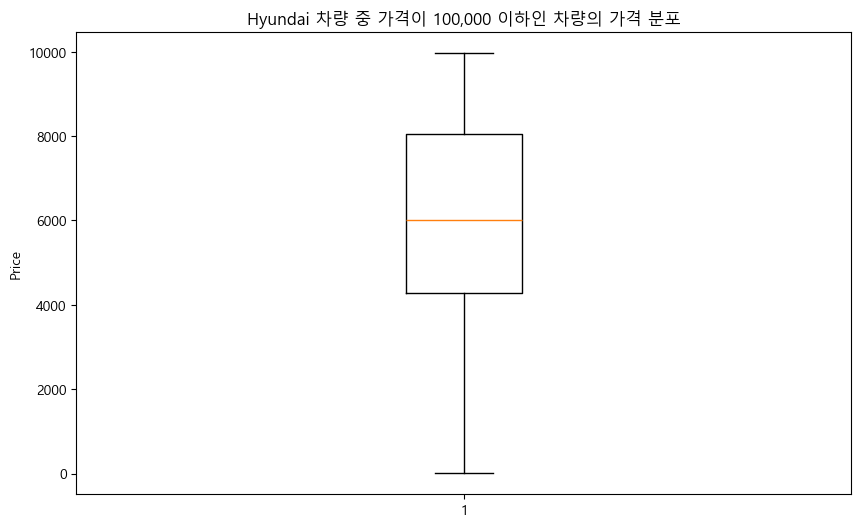

In [21]:
# Hyundai이며 가격이 100,000 이하인 차량 필터링
hyundai_under_100k = df[(df['manufacturer'] == 'Hyundai') & (df['Price'] <= 10000)]

# 개수 조회
count_under_100k = hyundai_under_100k.shape[0]
print(f"Hyundai이며 가격이 100,000 이하인 차량의 개수: {count_under_100k}")

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot(hyundai_under_100k['Price'])
plt.title('Hyundai 차량 중 가격이 100,000 이하인 차량의 가격 분포')
plt.ylabel('Price')
plt.show()

In [27]:
# Hyundai이며 가격이 10,000 이하인 차량 필터링
hyundai_under_100k = df[(df['manufacturer'] == 'Hyundai') & (df['Price'] <= 10000)]

# 포함된 car_model 조회
included_car_models = hyundai_under_100k['Engine'].unique()

print(f"Hyundai이며 가격이 10,000 이하인 차량의 engine: {included_car_models}")


Hyundai이며 가격이 10,000 이하인 차량의 engine: ['814 CC' '1197 CC' '1991 CC' '1120 CC' '1086 CC' '1493 CC' '1396 CC'
 '1582 CC' '1591 CC' '1599 CC' '1495 CC' '1186 CC' '998 CC' '1341 CC'
 '2359 CC' '1997 CC']


In [28]:
# Hyundai이며 가격이 10,000 이하인 차량 필터링
hyundai_under_100k = df[(df['manufacturer'] == 'Hyundai') & (df['Price'] <= 10000)]

# 포함된 car_model 조회
included_car_models = hyundai_under_100k['car_model'].unique()

print(f"Hyundai이며 가격이 10,000 이하인 차량의 car_model: {included_car_models}")


Hyundai이며 가격이 10,000 이하인 차량의 car_model: ['EON' 'i20' 'Elantra' 'Xcent' 'Grand' 'i10' 'Santro' 'Verna' 'Accent'
 'Getz' 'Sonata' 'Tucson' 'Elite']


In [29]:
# 각 Location에 따른 Fuel_Type 조회
location_fuel_type = df.groupby('Location')['Fuel_Type'].unique()

print(location_fuel_type)


Location
Ahmedabad          [Diesel, Petrol, CNG]
Bangalore               [Diesel, Petrol]
Chennai            [Petrol, Diesel, CNG]
Coimbatore              [Diesel, Petrol]
Delhi              [Diesel, Petrol, CNG]
Hyderabad     [LPG, Diesel, Petrol, CNG]
Jaipur             [Diesel, Petrol, LPG]
Kochi              [Petrol, Diesel, CNG]
Kolkata                 [Petrol, Diesel]
Mumbai        [CNG, Diesel, Petrol, LPG]
Pune          [Diesel, Petrol, CNG, LPG]
Name: Fuel_Type, dtype: object


In [41]:
# Jaipur와 Chennai의 데이터 분리
jaipur_data = df[df['Location'] == 'Jaipur']['Year']
chennai_data = df[df['Location'] == 'Kochi']['Year']

# 두 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(jaipur_data, chennai_data)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -15.377617045006046
P-Value: 1.9182986887086706e-48


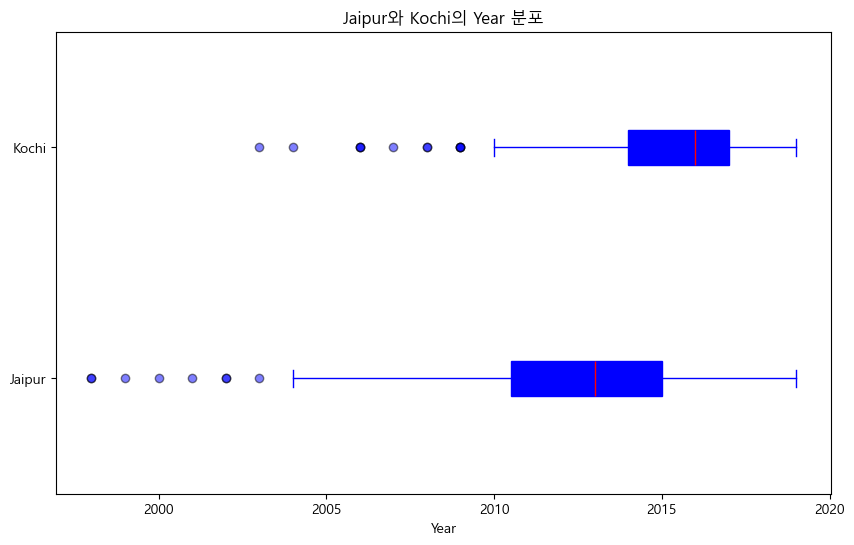

In [36]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot([jaipur_data, chennai_data], labels=['Jaipur', 'Kochi'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='blue', marker='o', color='blue', alpha=0.5))

plt.title('Jaipur와 Kochi의 Year 분포')
plt.xlabel('Year')
plt.show()

In [39]:
# 'manufacturer' 열에서 'Maruti'가 포함된 행 필터링
maruti_count = df['manufacturer'].str.contains('Maruti', case=False, na=False).sum()

# 전체 행 개수
total_count = df.shape[0]

# 비율 계산
maruti_ratio = (maruti_count / total_count) * 100

print(f"Maruti가 포함된 비율: {maruti_ratio:.2f}%")


Maruti가 포함된 비율: 20.44%


In [40]:
# 'manufacturer' 열에서 'Maruti'가 포함된 행 필터링
maruti_count = df['manufacturer'].str.contains('Hyundai', case=False, na=False).sum()

# 전체 행 개수
total_count = df.shape[0]

# 비율 계산
maruti_ratio = (maruti_count / total_count) * 100

print(f"Maruti가 포함된 비율: {maruti_ratio:.2f}%")


Maruti가 포함된 비율: 17.88%


In [42]:
df['manufacturer'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [47]:
# 'car_model'이 'Cayman'인 행 필터링
cayman_fuel_type = df[df['manufacturer'] == 'Force']['Fuel_Type']

print(cayman_fuel_type)


4939    Diesel
5121    Diesel
5145    Diesel
Name: Fuel_Type, dtype: object
